## BRACKENFELL

------------------------------------------------
### COMMUNITY ANALYSIS


Community detection in network theory is a graph partitioning problem where a group of nodes is identified such that the connections a node has within a group are more than the connections a node has outside a group.


#### Data Source


#Brackenfell Reply Network - Largest Component


#### Data Transformation



Community detection techniques are typically applied to undirected networks. The direction in which a tie is sent or received is irrelevant; a connection is established as long as there is an interaction between users. The current network is therefore converted to an undirected network for the purposes of this analysis.


#### Method


Using pythons iGraph library, I apply the **Leiden** method to this community detection problem.


In [1]:
#
#import import_ipynb
import os
import pandas as pd
import numpy as np
import math
import igraph as ig
import matplotlib.colors as color
import matplotlib.pyplot as plt
from operator import itemgetter
import random
from numpy import random as nprando
from IPython.display import Image, SVG, display

#########################################################################################

##SETUP##
nprando.seed(111)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 8)})
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth", None)

##FUNCTIONS##
def set_vertex_community(G, communities):
    G.vs['community'] = communities
    #print(v.index for v in G.vs)
    for v in G.vs.indices:
        #print(v)
        #Add 1 to save 0 for external edges
        G.vs[v]['community'] = G.vs[v]['community']+1
        

def set_edge_community(G):
    #Find internal edges and add their community to their attributes
    #for es in G.get_edgelist():
    for i, e_s in enumerate(G.get_edgelist()):
        #print(i, e_s)
        #for v,w in G.get_edgelist():
        if G.vs[e_s[0]]['community'] == G.vs[e_s[1]]['community']:
            #Internal edge, mark with community
            G.es[i]['community'] = G.vs[e_s[0]]['community']    
        else:
            #External edge, mark as 0
            G.es[i]['community'] = 0    


def set_vertex_color(i, r_off=1, g_off=1,b_off=1):
    #Assign a color to a vertex
    if i == 17: 
        c_hex = '#35516C'
    elif i == 18: 
        c_hex = '#4A732E'
    elif i == 35: 
        c_hex = '#D084D0'
    elif i == 14: 
        c_hex = '#ff00ff'
    else:
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)   
        c_rgb = (r,g,b)
        c_hex = color.to_hex(c_rgb)
        if c_hex == '#5e4227':
            c_hex = '#ffcb05'
        elif c_hex == '#caaf94':
            c_hex = '#ffee60'
        else:
            c_hex
    return c_hex

def set_edge_color(i, r_off=1, g_off=1,b_off=1):
    #Assign a color to a edge
    if i == 17: 
        c_hex = '#35516C'
    elif i == 18: 
        c_hex = '#4A732E'
    elif i == 35: 
        c_hex = '#D084D0'
    elif i == 14: 
        c_hex = '#ff00ff'
        #c_hex = '#4A732E'
    #if i = 22: #94e65e brown
    else: 
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)   
        c_rgb = (r,g,b)
        c_hex = color.to_hex(c_rgb)
        if c_hex == '#5e4227':
            c_hex = '#ffcb05'
        elif c_hex == '#caaf94':
            c_hex = '#ffee60'
        else: 
            c_hex
    return c_hex

def sort_index(lst, rev=True):
    index = range(len(lst))
    s = sorted(index, reverse=rev, key=lambda i: lst[i])
    return s

##VARIABLES##
e_node = "brackenfell_nodes_1.csv"
e_edge = "brackenfell_edges_1.csv"

#########################################################################################

##LOAD DATA##
df_node_1 = pd.read_csv(e_node, sep=";", usecols=['id', 'label'], dtype={'id': str})
#df_node_1.describe()  
df_edge_1 = pd.read_csv(e_edge, sep=";", usecols=['source', 'target', 'weight'], dtype={'source': str, 'target': str, 'weight':int})
df_edge_1 = df_edge_1.rename(columns={"source": "source_", 'target':"target_"})
#df_edge_1.describe()

##CONVERT TO DIRECTED IGRAPH
G_ig=ig.Graph.DictList(df_node_1.to_dict('records'), df_edge_1.to_dict('records'), directed=True, vertex_name_attr='id', edge_foreign_keys=('source_', 'target_'))
#print("\n" + '\033[1m' + 'Directed Graph:' + '\033[0m' + "\n")
edge_strength = G_ig.strength(weights='weight',mode='all')
G_ig.vs['strength'] = edge_strength
#print(ig.summary(G_ig))

##CONVERT TO UNDIRECTED IGRAPH
G_ig2=ig.Graph.DictList(df_node_1.to_dict('records'), df_edge_1.to_dict('records'), directed=False, vertex_name_attr='id', edge_foreign_keys=('source_', 'target_'))
G_ig2.simplify(multiple=True, loops=True, combine_edges=(dict(source='first', target='first', weight=sum)))
# Directed
#{'source': '278164594', 'target': '1114984823444201480', 'weight': 2}
#{'source': '1114984823444201480', 'target': '278164594', 'weight': 3}
# Undirected
#{'source': '1114984823444201480', 'target': '278164594', 'weight': 5}
print("\n" + '\033[1m' + 'Undirected Graph:' + '\033[0m' + "\n")
print(ig.summary(G_ig2))
#print(G_ig2)
                                            


Undirected Graph:

IGRAPH U-W- 1578 1844 -- 
+ attr: id (v), label (v), weight (e)
None


------------------------------------------------------
#### 1. OPTIMISATION



To choose an optimal resolution parameter (gamma), I estimate the leiden algorithm and explore community outcomes across different values of gamma. Letting the data tell me which points are more optimal than others, I select gamma at the points in the graph where the number of communities detected reach a constant plateau or flatness.

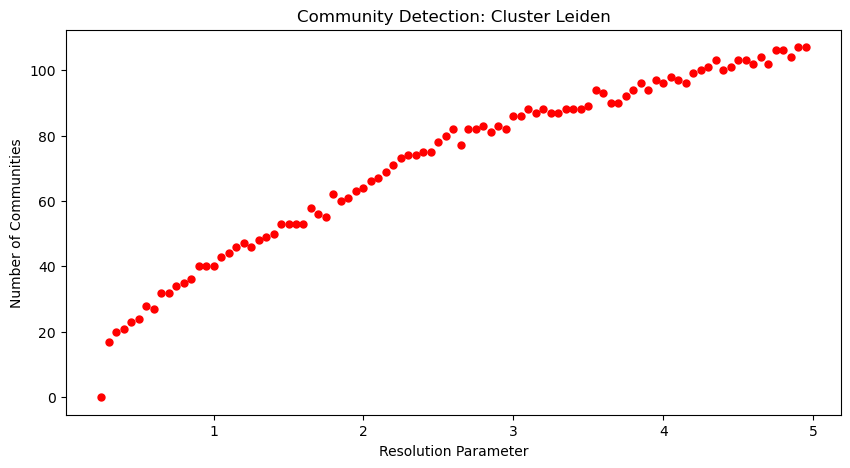

In [4]:
#
#LEIDEN OPTIMAL RESOLUTION PARAMETER
plt.rcParams["figure.figsize"]=[10,5]
gamma = np.arange(0.25,5,0.05)
gc =[]
nc=[0]*len(gamma)
#for i in range(1,len(gamma)):
#    leiden_clust = G_ig2.community_leiden(weights=G_ig2.es["weight"], objective_function='modularity', n_iterations = 100, resolution_parameter=gamma[i]) #1 #0.6 #0.05 #0.01
#    leiden_com = len(leiden_clust)

#    nc[i] = leiden_com
#    gc.append(gamma[i])

#plt.plot(gamma,nc,'ro',markersize=5)
#plt.title('Community Detection: Cluster Leiden')
#plt.xlabel('Resolution Parameter')
#plt.ylabel('Number of Communities')
#plt.savefig("{}".format(gpath) + x + "_leiden_resolution_w.png")
#plt.show()
Image(filename="brackenfell_optim_ld_1.png",  width = "650")

------------------------------------------
#### 2. DETECTION



Setting gamma = 0.8, I detect 34 communities with a modularity of 0.84. The detected communities are visualised below along with descriptions of the top 3 largest communities (by weighted degree).

In [5]:
#
#COMMUNITY SELECTION
#print("\n" + '\033[1m' + "Leiden (Optimum)" + '\033[0m')
print("--------\n")
gamma=0.8
optimum_clust = G_ig2.community_leiden(weights=G_ig2.es["weight"], objective_function='modularity', n_iterations = 200, resolution_parameter=gamma) #1 #0.6 #0.05 #0.01
print('\033[1m' + 'Communinities:' + '\033[0m')
print(len(optimum_clust)) #39 #34
optimum_mem = optimum_clust.membership
optimum_mod = G_ig2.modularity(optimum_mem, weights=G_ig2.es["weight"])
print("\n" + '\033[1m' + 'Modularity:' + '\033[0m')
print(optimum_mod) #0.8523986065565808 #0.8441848638707548
#print("\n--------")
#G_ig.vs['optimum_ld'] = optimum_mem

--------

Communinities:
34

Modularity:
0.8440284229710264



--------
Brackenfell Communities:



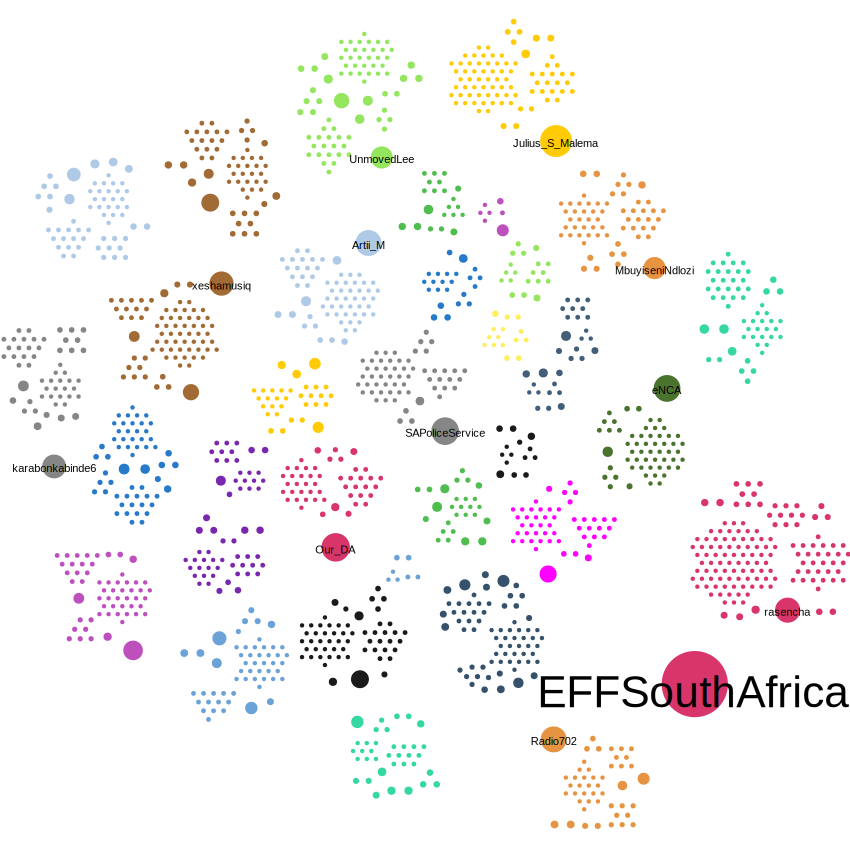

In [3]:
# Leiden (Optimal) Plot
'''set_vertex_community(G_ig, optimum_mem)
G_ig.vs['community_op'] = G_ig.vs['community']
set_edge_community(G_ig)
G_ig.es['community_op'] = G_ig.es['community']
vcolor_lst = [set_vertex_color(G_ig.vs[v]['community_op']) for v in G_ig.vs.indices]
G_ig.vs['hex_op'] = vcolor_lst
ecolor_lst = [set_edge_color(G_ig.es[i]['community_op']) for i, e_s in enumerate(G_ig.get_edgelist())]
G_ig.es['hex_op'] = ecolor_lst'''

print("\n" + "--------" + "\n" + '\033[1m' + 'Brackenfell Communities:' + '\033[0m' + "\n")


display(SVG(filename="brackenfell_comm_op_0_2.svg"))

In [7]:
#
#
#Leiden (Optimal) Community Degree and Density
e_vcom = "brackenfell_vcomm_1_a.csv"
e_ecom = "brackenfell_ecomm_1_a.csv"
#########################################################################################

df_vcomm_1 = pd.read_csv(e_vcom, sep=",", dtype={'Id': str})
df_vcomm_1 = df_vcomm_1.rename(columns={"Id": "id", 'Label':"label"})
#df_node_1.describe()  
df_ecomm_1 = pd.read_csv(e_ecom, sep=",", dtype={'Source': str, 'Target': str, 'Weight':int})
df_ecomm_1 = df_ecomm_1.rename(columns={"Source": "source_", 'Target':"target_", 'Weight':"weight"})
#df_edge_1.describe()

##CONVERT TO UNDIRECTED IGRAPH
G_ig1=ig.Graph.DictList(df_vcomm_1.to_dict('records'), df_ecomm_1.to_dict('records'), directed=False, vertex_name_attr='id', edge_foreign_keys=('source_', 'target_'))
com_lst = set(df_vcomm_1["community_op"].to_list())
#print(com_lst)

##CONVERT TO SUBGRAPH
siz_c_lst = []
den_c_lst = []
deg_c_lst = []
avg_deg_c_lst = []

for com in com_lst:
    df_vc = df_vcomm_1.loc[df_vcomm_1["community_op"]==com]
    df_ec = df_ecomm_1.loc[df_ecomm_1["community_op"]==com]
    G_ig_c=ig.Graph.DictList(df_vc.to_dict('records'), df_ec.to_dict('records'), directed=False, vertex_name_attr='id', edge_foreign_keys=('source_', 'target_'))

#########################################################################################


    #size
    siz_c = G_ig_c.vcount()
    siz_c_lst.append(siz_c)
    #print("\n" + '\033[1m' + "Highest Total Degree" + '\033[0m')   
    # density
    den_c = G_ig_c.density()
    den_c_lst.append(den_c)
    # degree
    deg_c = G_ig_c.strength(weights='weight',mode='all')
    tot_deg_c = np.sum(deg_c)
    deg_c_lst.append(tot_deg_c)
    avg_deg_c = np.mean(deg_c)
    avg_deg_c_lst.append(avg_deg_c)
    #print(siz_c_lst)
    #print(den_c_lst)
    #print(deg_c_lst)

    max_siz_c = sort_index(siz_c_lst)
    max_den_c = sort_index(den_c_lst)
    max_deg_c = sort_index(deg_c_lst)
    max_avg_deg_c = sort_index(avg_deg_c_lst)
    #print(sort_index(siz_c_lst))
    #print(sort_index(den_c_lst))
    #print(sort_index(deg_c_lst))

    
print("\n" + "--------" + "\n" + '\033[1m' + "Top 3 Weighted Degree Communities: "  +  '\033[0m')
#print("--------------------------------")
for i, c in enumerate(max_deg_c[:3]):
    com_ = c+1
    #com1 = G_ig.vs.select(label="PieterDuToit")["community_op"]
    print("--------------------------------")
    print("\n" + "--------" + "\n" + '\033[1m' + "Community " + str(i+1) + ":" + '\033[0m')
    print("--------")
    #print("Community " + str(i+1))
    #print("--------------------------------")
    print("\n" + '\033[1m' +"Size:" + '\033[0m') 
    print(siz_c_lst[c])
    print("\n" + '\033[1m' +"Density:" + '\033[0m')
    print(den_c_lst[c])
    print("\n" + '\033[1m' +"Average Degree:" + '\033[0m')
    print(format(avg_deg_c_lst[c],".2f"))
    print("\n" + '\033[1m' +"Total Degree:" + '\033[0m')
    print(int(deg_c_lst[c]))
    print("\n" + '\033[1m' +"Members(10*):" + '\033[0m')
    for i, v1 in enumerate(sorted(G_ig1.vs.select(community_op=com_), key=lambda x:x['strength'], reverse=True)[:10]):
        print(i, v1["label"])

'''
#Leiden (Optimal) Community Degree and Density
#size
siz_c_lst = optimum_clust.sizes()
#print("\n" + '\033[1m' + "Highest Total Degree" + '\033[0m')
den_c_lst = []
deg_c_lst = []
avg_deg_c_lst = []
for c in range(0,len(optimum_clust)):
    # create subgraph
    G_ig_c = optimum_clust.subgraph(c)
    # density
    den_c = G_ig_c.density()
    den_c_lst.append(den_c)
    # degree
    deg_c = G_ig_c.strength(weights='weight',mode='all')
    tot_deg_c = np.sum(deg_c)
    deg_c_lst.append(tot_deg_c)
    avg_deg_c = np.mean(deg_c)
    avg_deg_c_lst.append(avg_deg_c)
#print(siz_c_lst)
#print(den_c_lst)
#print(deg_c_lst)

max_siz_c = sort_index(siz_c_lst)
max_den_c = sort_index(den_c_lst)
max_deg_c = sort_index(deg_c_lst)
max_avg_deg_c = sort_index(avg_deg_c_lst)
#print(sort_index(siz_c_lst))
#print(sort_index(den_c_lst))
#print(sort_index(deg_c_lst))

print("\n" + "--------" + "\n" + '\033[1m' + "Top 3 Largest Degree Communities: "  +  '\033[0m')
#print("--------------------------------")
for i, c in enumerate(max_deg_c[:3]):
    com = c+1
    #com1 = G_ig.vs.select(label="PieterDuToit")["community_op"]
    print("--------------------------------")
    print("\n" + "--------" + "\n" + '\033[1m' + "Community " + str(i+1) + ":" + '\033[0m')
    print("--------")
    print("\n" + '\033[1m' +"Size:" + '\033[0m') 
    print(siz_c_lst[c])
    print("\n" + '\033[1m' +"Density:" + '\033[0m')
    print(den_c_lst[c])
    print("\n" + '\033[1m' +"Average Degree:" + '\033[0m')
    print(int(avg_deg_c_lst[c]))
    print("\n" + '\033[1m' +"Total Degree:" + '\033[0m')
    print(int(deg_c_lst[c]))
    print("\n" + '\033[1m' +"Members(10*):" + '\033[0m')
    for i, v1 in enumerate(sorted(G_ig.vs.select(community_op=com), key=lambda x:x['strength'], reverse=True)[:10]):
        print(i, v1["label"])

#print("\n" + "--------")  
print("\n" + "--------------------------------")
print("*Top 10 members in community with the largest *weighted degree*.")
'''

print("--------------------------------")
print("*Top 10 highest degree in community.")


--------
Top 3 Weighted Degree Communities: 
--------------------------------

--------
Community 1:
--------

Size:
141

Density:
0.016109422492401215

Average Degree:
2.26

Total Degree:
318

Members(10*):
0 EFFSouthAfrica
1 rasencha
2 citrusramaphosa
3 Matewis_Dyches
4 IvorChalmers_
5 Clint_ZA
6 rubyjoms
7 Dumzie2
8 EffRonny
9 stormingnormanp
--------------------------------

--------
Community 2:
--------

Size:
73

Density:
0.03538812785388128

Average Degree:
2.55

Total Degree:
186

Members(10*):
0 UnmovedLee
1 ewnreporter
2 shroompopsicle
3 TeamNews24
4 wesleyfestersa
5 mjayijayi
6 Macfarlane123
7 HonourableHloni
8 Thandol76937181
9 SA_Mum
--------------------------------

--------
Community 3:
--------

Size:
70

Density:
0.03850931677018633

Average Degree:
2.66

Total Degree:
186

Members(10*):
0 lilanichlsn
1 RenaldoGouws
2 Mellow_Rocker
3 alfred_cabonena
4 ThuliMadonsela3
5 ramalokot
6 SimonPGrindrod
7 Om3rta_XIII
8 sick6_six
9 nash_cold
--------------------------------
*

In [8]:
#
#Vertex attributes
df_vcomm = G_ig.get_vertex_dataframe()
df_vcomm = df_vcomm.loc[:,['id','label','strength','community_op','hex_op']]
#df_vcomm.to_csv("brackenfell_vcomm_1.csv", sep=";",encoding='utf-8',  index=False)

#Edge attributes
df_ecomm = G_ig.get_edge_dataframe()
df_ecomm = df_ecomm.loc[:,['source_','target_','community_op','hex_op']]
df_ecomm = df_ecomm.rename(columns={"source_": "source", 'target_':"target"})
#df_ecomm.set_index(['source', 'target'], inplace=True)
#df_ecomm.to_csv("brackenfell_ecomm_1.csv", sep=";",encoding='utf-8',  index=False)

#find community degree
#plot density degree

------------------------------------------------
#### 3. EVALUATION



Using various pair counting scores, I compare community outcomes of the leiden model at gamma=0.8 and gamma=1.5, and compare the leiden model at gamma=0.8 and the louvain model. 


#### 3.1. Leiden (Gamma=0.8) vs Leiden (Gamma=1.5)

In [9]:
#
#COMMUNITY SELECTION
#print("\n" + '\033[1m' + "Leiden (Optimum)" + '\033[0m')
#print("\n"+"--------"+"\n"+)
#print("\n" + "--------" + "\n" + '\033[1m' + "Model Comparison: "  +  '\033[0m')
#print("--------------------------------")
print("--------" + "\n" + '\033[1m' + "Leiden (Gamma=1.5)" + '\033[0m')
print("--------------------------------")
gamma=1.5
optimum_clust_2 = G_ig2.community_leiden(weights=G_ig2.es["weight"], objective_function='modularity', n_iterations = 100, resolution_parameter=gamma) #1 #0.6 #0.05 #0.01
print("\n"+'\033[1m' + 'Communinities:' + '\033[0m')
print(len(optimum_clust_2)) #39 #34
optimum_mem_2 = optimum_clust_2.membership
optimum_mod_2 = G_ig2.modularity(optimum_mem_2, weights=G_ig2.es["weight"])
print("\n" + '\033[1m' + 'Modularity:' + '\033[0m')
print(optimum_mod_2) #0.8523986065565808 #0.8441848638707548
#print("\n--------")
#G_ig.vs['optimum_ld'] = optimum_mem#

--------
Leiden (Gamma=1.5)
--------------------------------

Communinities:
47

Modularity:
0.8420700374821725


In [10]:
# Leiden - Louvain
lele_vi = optimum_clust.compare_to(optimum_clust_2, method='nvi', remove_none=False)
lele_adjr = optimum_clust.compare_to(optimum_clust_2, method='adjusted_rand', remove_none=False)
lele_nmi = optimum_clust.compare_to(optimum_clust_2, method='nmi', remove_none=False)
print("\n" + '\033[1m' + "Comparison Scores:" + '\033[0m')
print("--------" + "\n")
print('\033[1m' + 'Variation of Information:' + '\033[0m')
print(lele_vi)
print("\n" + '\033[1m' + 'Adjusted Rand:' + '\033[0m')
print(lele_adjr)
print("\n" + '\033[1m' + 'Normalized Mutual Information:' + '\033[0m')
print(lele_nmi)
print("--------------------------------")


Comparison Scores:
--------

Variation of Information:
0.8523313862639712

Adjusted Rand:
0.6703353281906859

Normalized Mutual Information:
0.8523313862639712
--------------------------------


In [11]:
df_vcomm_1['community_op2']=optimum_mem_2
df_lele = pd.crosstab(index=df_vcomm_1['community_op'], columns=df_vcomm_1['community_op2'])
#print(df_lele)

#### 3.2. Leiden (Gamma=0.8) vs Louvain

In [12]:
#Louvain Method
ig_louvain_clust = G_ig2.community_multilevel(weights="weight")
#print("\n" + '\033[1m' + "Stats" + '\033[0m')
print("--------" + "\n" + '\033[1m' + "Louvain" + '\033[0m')
print("--------------------------------")
print("\n"+'\033[1m' + 'Communinities:' + '\033[0m')
print(len(ig_louvain_clust)) #42 #38 #39 #10
#ig_louvain_hist = ig_louvain_clust.size_histogram
#ig.plot(ig_louvain_hist,"{}".format(gpath) + x + "_louvain_hist_1.png")
ig_louvain_mem = ig_louvain_clust.membership
ig_louvain_mod = G_ig2.modularity(ig_louvain_mem, weights=G_ig2.es["weight"])
print("\n" + '\033[1m' + 'Modularity:' + '\033[0m')
print(ig_louvain_mod) #0.8511943740418598 #0.8428720537220518 #0.4548224731375923 #0.6868678459937566
#print("\n--------")
#G_ig.vs['community_ln'] = ig_louvain_mem


--------
Louvain
--------------------------------

Communinities:
37

Modularity:
0.8431499313569365


In [13]:
# Leiden - Louvain
lelo_vi = optimum_clust.compare_to(ig_louvain_clust, method='nvi', remove_none=False)
lelo_adjr = optimum_clust.compare_to(ig_louvain_clust, method='adjusted_rand', remove_none=False)
lelo_nmi = optimum_clust.compare_to(ig_louvain_clust, method='nmi', remove_none=False)
print("\n" + '\033[1m' + "Comparison Scores:" + '\033[0m')
print("--------" + "\n")
print('\033[1m' + 'Variation of Information:' + '\033[0m')
print(lelo_vi)
print("\n" + '\033[1m' + 'Adjusted Rand:' + '\033[0m')
print(lelo_adjr)
print("\n" + '\033[1m' + 'Normalized Mutual Information:' + '\033[0m')
print(lelo_nmi)
print("--------------------------------")


Comparison Scores:
--------

Variation of Information:
0.8854463301112254

Adjusted Rand:
0.7728835393099504

Normalized Mutual Information:
0.8854463301112254
--------------------------------


In [14]:
df_vcomm_1['community_lo']=ig_louvain_mem
df_lelo = pd.crosstab(index=df_vcomm_1['community_op'], columns=df_vcomm_1['community_lo'])
#print(df_lelo)

------------------------------------------
#### 4. SUMMARY



In this section, I use community detection methods to identify densely connected groups and communities present in the #Senekal twitter reply network.

When searching for optimum modularity, I find the resolution parameter at gamma=0.8 and gamma=1.5 robust. I detect 34 and 47 communities with a modularity score of 0.844 and 0.842 at these points, respectively. Similarly, using the louvain method, 37 communities are detected with a modularity score of 0.843. The coincidence scores from the evaluation and the modularity scores, which are above the 0.7 threshold, are all a sign of a well partitioned network. However, given the large number of communities detected, a reasonable or meaningful interpretation is difficult. In other words, attemping to characterise all 34 communities or predict each of their behaviour and influence in the discourse based on their memberships will unliklely result in an intuitive outcome. 

To atleast get some sense of the communities detected, I examine the sizes, densities, and degrees of the top 3 largest communities as well as the top 10 members (sorted by *weighted degree*) assigned to each of the 3 communities. Going by the users and tweet content, **Community 1** and **Community 2** appear balanced in terms of political or other affiliations as well as members in support or opposition of the protest, while users in **Community 3** seem to share or echo a similar rhetoric and language in opposition of the movement. Evidence of this is not conclusive, however.  

In the next section, I classify users by the positions or roles they play within the discourse based on their patterns of interactions and other network features.